# Midterm (MACS 30100), February 5, 2018
### Laurence Warner
You will have an hour and thirty minutes to take this exam.
1. Put your name in the space provided above (without the brackets).
2. Download this notebook and accompanying data `LenderDataLong.dta`.
3. The class will disconnect their wi-fi and begin taking the exam.
4. The exam is open computer, closed internet, open note.
5. Once you are done, you will signal to a TA or instructor to come over and monitor while you reconnect to the internet and upload your edited notebook to Canvas.

Remember that you must clearly indicate your answers to all questions below. We will give partial credit for partially correct answers. The midterm is worth 20 points (2 problem sets).

## The data
This two exercises of this midterm and all their respective subparts will use the `LenderData.csv` dataset, which contains observations of characteristics on short-term, high interest rate, lender information. You are not to use this data outside of this class. It is a jittered and randomized version of a dataset used in a published research paper.

Each observation contains characteristics of a particular lender location Read it into Python using the `pandas.read_csv()` command. The variables are the following:

* `avgrate`: average annualized interest rate of all loans in percentage points (235 = two hundred and thirty five percent)
* `numstores`: number of other stores owned by the same owner (measure of size)
* `defrate`: default rate on loans from that store during 2010
* `pdrad3`: number of payday lenders within a three-mile radius of the store (measure of competition)
* `pnrad3`: number of pawn lenders within a three-mile radius of the store (measure of competition)
* `totrad3`: total number of other lenders within a three-mile radius of the store (measure of competition)
* `unrt_zip`: unemployment rate in the zip code of the store
* `medtotinc2010`: median total household income in the zip code of the store
* `edbachplus_zip`: average education level in years of schooling of heads of household in the zip code of the store
* `pop_zip`: population in zip code of the store
* `mdage_zip`: median age (in years) in zip code of the store
* `pctblk2_zip`: percent of the population that is black in the zip code of the store in percentage points (2.2=two point two percent)

In [15]:
import pandas as pd

In [16]:
lender_data = pd.read_csv('LenderData.csv')

In [17]:
lender_data.head()

,avgrate,numstores,defrate,pdrad3,pnrad3,totrad3,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip
0,521.429993,23,24.390244,7,3,12,5.7,38485.44531,40.2,44821,33.6,1.0
1,521.429993,23,38.596489,15,2,18,7.1,31289.11133,14.1,68295,29.2,2.2
2,521.429993,23,38.954868,6,3,11,7.1,31289.11133,14.1,68295,29.2,2.2
3,521.429993,23,27.352297,28,29,58,9.2,31421.22266,11.3,26524,28.5,1.4
4,521.429993,23,30.055660,22,17,42,7.5,27502.00000,22.3,28936,30.8,2.7


## 1. Using the distributions of interest rates and median income (10 points)

1A) [2 points] Create a plot of the histogram of high interest rate lenders interest rates `avgrate`. Use 30 bins. Make sure to label your axes and give the figure a title. If you had to group lenders into $N$ categories, how many categories would you choose based on the interest rate data? That is, how many groupings to you see in these data?

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
avgrate = lender_data['avgrate']
avgrate.head()

0    521.429993
1    521.429993
2    521.429993
3    521.429993
4    521.429993
Name: avgrate, dtype: float64

Text(0.5,1,'Interest rate histogram')

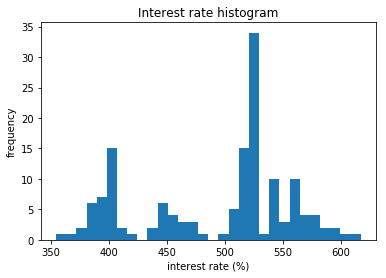

In [20]:
n, bins, patches = plt.hist(avgrate, bins = 30)
plt.xlabel('interest rate (%)')
plt.ylabel('frequency')
plt.title('Interest rate histogram')

I see 4 groupings.
Centered around: 380, 460, 520, 560.

1B) [1 point] Create a plot of the histogram of median total household income `medtotinc2010`. Use 30 bins. Make sure to label your axes and give the figure a title.

In [21]:
inc = lender_data['medtotinc2010']
inc.head()

0    38485.44531
1    31289.11133
2    31289.11133
3    31421.22266
4    27502.00000
Name: medtotinc2010, dtype: float64

Text(0.5,1,'Income histogram')

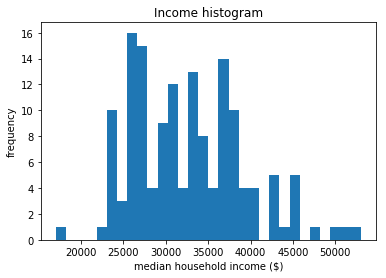

In [22]:
n, bins, patches = plt.hist(inc, bins = 30)
plt.xlabel('median household income ($)')
plt.ylabel('frequency')
plt.title('Income histogram')

1C) [5 points] Use maximum likelihood estimation to fit a lognormal distribution $LN(\mu, \sigma)$ to the median income data `medtotinc2010`. Report your estimated $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$ as well as the likelihood function value at the maximum (not the negative log likelihood). Report your estimate of the variance-covariance matrix of your maximum likelihood estimates of $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$. Report the standard error on the estimate for $\hat{\mu}_{mle}$.

In [23]:
def lognormal_pdf(x, params):
    '''
    Given data (e.g. in ndarray) and a 2-array of parameters for the lognormal distribution, returns an ndarray of pdf values.
    '''
    mu, sigma = params
    pdf = 1/x/sigma/np.sqrt(2*np.pi) * np.exp(-(np.log(x)-mu)**2/2/sigma/sigma)
    return pdf

In [24]:
PARAMS_EX = (5,1)
X_EX = np.array([np.exp(5), 5])

In [25]:
PDF_EX = lognormal_pdf(X_EX, PARAMS_EX)
PDF_EX

array([ 0.00268805,  0.00025447])

In [26]:
import numpy as np

In [27]:
def log_likelihood(pdf_func, x, params):
    '''
    Given a pdf function, data and parameters, returns log likelihood of seeing data from that distribution.
    '''
    pdf_array = pdf_func(x, params)
    log = np.log(pdf_array)
    ll = np.sum(log)
    return ll

In [28]:
LL = log_likelihood(lognormal_pdf, X_EX, PARAMS_EX)
LL

-14.195270613663061

In [29]:
def neg_log_likelihood(pdf_func, x, params):
    ll = log_likelihood(pdf_func, x, params)
    nll = -ll
    return nll

In [30]:
NLL = neg_log_likelihood(lognormal_pdf, X_EX, PARAMS_EX)
NLL

14.195270613663061

We want to choose params to minimise the neg_log_likelihood function. 
1). Define criterion function

In [31]:
def criterion_func(params, *args):
    '''
    Given a parameter vector, and passed in a tuple of args (data, pdf function), returns the value of the neg_log_likelihood function.
    '''
    data, pdf_func = args
    nll = neg_log_likelihood(pdf_func, data, params)
    return nll

Minimization problem

In [32]:
from scipy.optimize import minimize

1D) [2 points] Plot the predicted distribution from your maximum likelihood estimates $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$ against the histogram of the data.

In [47]:
log_inc = np.log(lender_data['medtotinc2010'])
log_inc.head()

0    10.558035
1    10.351025
2    10.351025
3    10.355239
4    10.222014
Name: medtotinc2010, dtype: float64

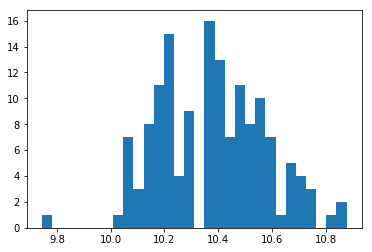

In [48]:
n, bins, patches = plt.hist(log_inc, bins = 30)

In [50]:
P_INIT = (10.4, 0.2) #from eyeballing histogram

In [51]:
args = (inc, lognormal_pdf)

In [58]:
results = minimize(criterion_func, P_INIT, args)
results

      fun: 1497.1030088862071
 hess_inv: array([[  3.49134504e-06,  -1.15951312e-06],
       [ -1.15951312e-06,   3.87709150e-07]])
      jac: array([  3.05175781e-05,   9.15527344e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 380
      nit: 9
     njev: 92
   status: 2
  success: False
        x: array([ 10.37738021,   0.1994993 ])

In [54]:
params_mle = results.x

In [55]:
print("MLE estimates: mu = ", round(params_mle[0],3), "sigma = ", round(params_mle[1],3))

MLE estimates: mu =  10.377 sigma =  0.199


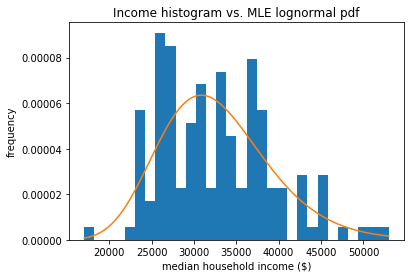

In [59]:
n, bins, patches = plt.hist(inc, bins = 30, normed = True)  #normed to a density function to compare!
plt.xlabel('median household income ($)')
plt.ylabel('frequency')
plt.title('Income histogram vs. MLE lognormal pdf')

X = np.linspace(min(inc), max(inc), 1000)
Y = lognormal_pdf(X, params_mle)
plt.plot(X,Y)

Log-likelihood value.
From results:

### VCV of estimates 

In [63]:
h = results.hess_inv
h

array([[  3.49134504e-06,  -1.15951312e-06],
       [ -1.15951312e-06,   3.87709150e-07]])

In [65]:
off_diag = np.array([[1, -1], [-1, 1]])
off_diag

array([[ 1, -1],
       [-1,  1]])

In [66]:
vcv = h * off_diag
vcv

array([[  3.49134504e-06,   1.15951312e-06],
       [  1.15951312e-06,   3.87709150e-07]])

Standard error on estimate for mu

In [67]:
se = np.sqrt(vcv[0, 0])
se

0.0018685141265101296

## 2. Determinants of lender interest rates (10 points)

2A) [3 points] Assume a simple regression model of four factors that influence the interest rates that a lender charges, namely, number of stores, default rate in the area, unemployment rate in the area, and median household income in the area.

$$ avgrate_i = \beta_0 + \beta_1 numstores_i + \beta_2 defrate_i + \beta_3 unrt_zip_i + \beta_4 medtotinc2010_i + u_i $$

Estimate this model by OLS using the `statsmodels.api` package. Don't forget to include a constant. Print your results summary. Which variables are significant at the 5-percent level? How would you interpret in words the estimated coefficient on `numstores`?

In [73]:
import statsmodels.api as sm

In [79]:
c = lender_data.columns
c

Index(['avgrate', 'numstores', 'defrate', 'pdrad3', 'pnrad3', 'totrad3',
       'unrt_zip', 'medtotinc2010', 'edbachplus_zip', 'pop_zip', 'mdage_zip',
       'pctblk2_zip'],
      dtype='object')

In [84]:
lender_data_mod1 = lender_data.drop(labels = [c[3], c[4], c[5], c[8], c[9], c[10], c[11]], axis = 1)
lender_data_mod1.head()

,avgrate,numstores,defrate,unrt_zip,medtotinc2010
0,521.429993,23,24.390244,5.7,38485.44531
1,521.429993,23,38.596489,7.1,31289.11133
2,521.429993,23,38.954868,7.1,31289.11133
3,521.429993,23,27.352297,9.2,31421.22266
4,521.429993,23,30.055660,7.5,27502.00000


In [86]:
corr = lender_data_mod1.corr()
corr

,avgrate,numstores,defrate,unrt_zip,medtotinc2010
avgrate,1.000000,-0.286821,0.059981,0.012249,0.064235
numstores,-0.286821,1.000000,0.179397,-0.022296,0.039090
defrate,0.059981,0.179397,1.000000,0.017956,-0.157810
unrt_zip,0.012249,-0.022296,0.017956,1.000000,-0.582841
medtotinc2010,0.064235,0.039090,-0.157810,-0.582841,1.000000


In [87]:
import seaborn as sb

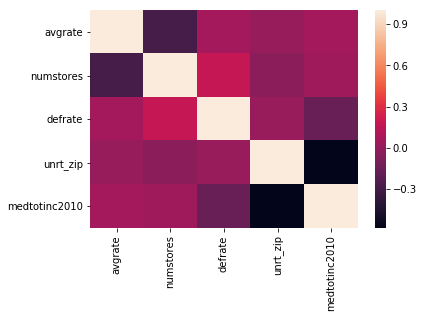

In [88]:
sb.heatmap(corr)

In [91]:
y = avgrate

In [99]:
X = lender_data_mod1.drop(labels = ['avgrate'], axis = 1)
X = sm.add_constant(X)
X.head()

,const,numstores,defrate,unrt_zip,medtotinc2010
0,1.0,23,24.390244,5.7,38485.44531
1,1.0,23,38.596489,7.1,31289.11133
2,1.0,23,38.954868,7.1,31289.11133
3,1.0,23,27.352297,9.2,31421.22266
4,1.0,23,30.055660,7.5,27502.00000


In [107]:
results = sm.OLS(endog = y, exog = X, missing = 'drop').fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                avgrate   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.375
Date:                Mon, 05 Feb 2018   Prob (F-statistic):            0.00229
Time:                        12:52:02   Log-Likelihood:                -812.28
No. Observations:                 147   AIC:                             1635.
Df Residuals:                     142   BIC:                             1650.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           453.4117     51.263      8.845

Significant at 5% level:
Const, numstores

Numstores: coef = -2.628. Not surprise negative: negative simple correlation shown in heatmap.
Interpretation: ceteris paribus, if the owner has one more store, expected interest rate falls by 2.628 % points.

2B) [4 points] Now assume a richer model for the determinants of lender interest rates, which includes the following measures of competition and other demographic variables.

$$ avgrate_i = \beta_0 + \beta_1 numstores_i + \beta_2 defrate_i + \beta_3 unrt_zip_i + \beta_4 medtotinc2010_i + ... $$
$$ \qquad\qquad\qquad\qquad \beta_5 totrad3_i + \beta_6 edbachplus\_zip_i + \beta_7 pop\_zip_i + \beta_8 mdage\_zip_i + \beta_9 pctblk2\_zip_i + u_i $$

Estimate this regression by OLS using the `statsmodels.api` package. In controlling for these new varaibles, do any of the originally estimated coefficients from the model in part (2A) become statistically not significant (at the 5 percent level)? Of these new coefficients ($\beta_5$ through $\beta_9$), which one(s) are the most statistically significant?

In [110]:
lender_data.columns

Index(['avgrate', 'numstores', 'defrate', 'pdrad3', 'pnrad3', 'totrad3',
       'unrt_zip', 'medtotinc2010', 'edbachplus_zip', 'pop_zip', 'mdage_zip',
       'pctblk2_zip'],
      dtype='object')

In [111]:
lender_data_mod2 = lender_data.drop(labels = [c[3], c[4]], axis = 1)
lender_data_mod2.head()

,avgrate,numstores,defrate,totrad3,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip
0,521.429993,23,24.390244,12,5.7,38485.44531,40.2,44821,33.6,1.0
1,521.429993,23,38.596489,18,7.1,31289.11133,14.1,68295,29.2,2.2
2,521.429993,23,38.954868,11,7.1,31289.11133,14.1,68295,29.2,2.2
3,521.429993,23,27.352297,58,9.2,31421.22266,11.3,26524,28.5,1.4
4,521.429993,23,30.055660,42,7.5,27502.00000,22.3,28936,30.8,2.7


In [112]:
X = lender_data_mod2.drop(labels = ['avgrate'], axis = 1)
X = sm.add_constant(X)
X.head()

,const,numstores,defrate,totrad3,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip
0,1.0,23,24.390244,12,5.7,38485.44531,40.2,44821,33.6,1.0
1,1.0,23,38.596489,18,7.1,31289.11133,14.1,68295,29.2,2.2
2,1.0,23,38.954868,11,7.1,31289.11133,14.1,68295,29.2,2.2
3,1.0,23,27.352297,58,9.2,31421.22266,11.3,26524,28.5,1.4
4,1.0,23,30.055660,42,7.5,27502.00000,22.3,28936,30.8,2.7


In [113]:
results = sm.OLS(endog = y, exog = X, missing = 'drop').fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                avgrate   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     2.846
Date:                Mon, 05 Feb 2018   Prob (F-statistic):            0.00419
Time:                        12:58:45   Log-Likelihood:                -808.23
No. Observations:                 147   AIC:                             1636.
Df Residuals:                     137   BIC:                             1666.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            613.9741     85.491      7.

Originals: statistical significance remains same.
New: edbachplus_zip(p = 4.7%) only statistically significant variable. As education in area increases, interest rates decrease.

2C) [3 points] Create a new binary variable called `avgrate_high` that equals 1 if `avgrate` > 425 (edit), and equals 0 otherwise. Estimate a logistic regression using the `statsmodels.api` package. Let $X\beta$ be the linear coefficients and variables from the model from part (2B).

$$ Pr(avgrate\_high=1|X\beta) = \frac{X\beta}{1 + X\beta} $$

Report the variables whose coefficients are estimated to be significant at the 5-percent level.

In [115]:
lender_data_mod2.head()

,avgrate,numstores,defrate,totrad3,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip
0,521.429993,23,24.390244,12,5.7,38485.44531,40.2,44821,33.6,1.0
1,521.429993,23,38.596489,18,7.1,31289.11133,14.1,68295,29.2,2.2
2,521.429993,23,38.954868,11,7.1,31289.11133,14.1,68295,29.2,2.2
3,521.429993,23,27.352297,58,9.2,31421.22266,11.3,26524,28.5,1.4
4,521.429993,23,30.055660,42,7.5,27502.00000,22.3,28936,30.8,2.7


In [124]:
lender_data_mod2['avgrate_bin'] = 0

In [125]:
lender_data_mod2.head()

,avgrate,numstores,defrate,totrad3,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip,avgrate_bin
0,521.429993,23,24.390244,12,5.7,38485.44531,40.2,44821,33.6,1.0,0
1,521.429993,23,38.596489,18,7.1,31289.11133,14.1,68295,29.2,2.2,0
2,521.429993,23,38.954868,11,7.1,31289.11133,14.1,68295,29.2,2.2,0
3,521.429993,23,27.352297,58,9.2,31421.22266,11.3,26524,28.5,1.4,0
4,521.429993,23,30.055660,42,7.5,27502.00000,22.3,28936,30.8,2.7,0


In [127]:
for i in range(len(lender_data_mod2)):
    
    if lender_data_mod2['avgrate'][i] > 425:
        lender_data_mod2['avgrate_bin'][i] = 1

/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [128]:
lender_data_mod2.head()

,avgrate,numstores,defrate,totrad3,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip,avgrate_bin
0,521.429993,23,24.390244,12,5.7,38485.44531,40.2,44821,33.6,1.0,1
1,521.429993,23,38.596489,18,7.1,31289.11133,14.1,68295,29.2,2.2,1
2,521.429993,23,38.954868,11,7.1,31289.11133,14.1,68295,29.2,2.2,1
3,521.429993,23,27.352297,58,9.2,31421.22266,11.3,26524,28.5,1.4,1
4,521.429993,23,30.055660,42,7.5,27502.00000,22.3,28936,30.8,2.7,1


In [130]:
X = lender_data_mod2.drop(labels = ['avgrate', 'avgrate_bin'], axis = 1)
X = sm.add_constant(X)
X.head()

,const,numstores,defrate,totrad3,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip
0,1.0,23,24.390244,12,5.7,38485.44531,40.2,44821,33.6,1.0
1,1.0,23,38.596489,18,7.1,31289.11133,14.1,68295,29.2,2.2
2,1.0,23,38.954868,11,7.1,31289.11133,14.1,68295,29.2,2.2
3,1.0,23,27.352297,58,9.2,31421.22266,11.3,26524,28.5,1.4
4,1.0,23,30.055660,42,7.5,27502.00000,22.3,28936,30.8,2.7


In [131]:
y = lender_data_mod2['avgrate_bin']

In [132]:
LogitModel = sm.Logit(y, X)
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.323724
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            avgrate_bin   No. Observations:                  147
Model:                          Logit   Df Residuals:                      137
Method:                           MLE   Df Model:                            9
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:                  0.4102
Time:                        13:08:29   Log-Likelihood:                -47.587
converged:                       True   LL-Null:                       -80.685
                                        LLR p-value:                 8.446e-11
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.3839      4.973      1.686      0.092      -1.362      18.130
numstores         -0.2436      0.045     -5.375      0.000      -0.332      -0.155
defrate            0.0927      0.036      2.595      0.009       0.023       0.163
totrad3           -0.0099      0.029     -0.340      0.734      -0.067       0.047
unrt_zip           0.1030      0.190      0.543      0.587      -0.269       0.475
medtotinc2010   8.685e-05   6.86e-05      1.265      0.206   -4.77e-05       0.000
edbachplus_zip    -0.0642      0.038     -1.692      0.091      -0.138       0.010
pop_zip        -1.238e-05   2.32e-05     -0.534      0.593   -5.78e-05     3.3e-05
mdage_zip         -0.1737      0.125     -1.385      0.166      -0.419       0.072
pctblk2_zip        0.1186      0.338      0.350      0.726      -0.545       0.782
==================================================================================
"""

Significant at 5% level: numstores (-), defrate (+).